<a href="https://colab.research.google.com/github/mpfoster/Biochem5721/blob/master/binding%2Bplots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
# Quadratic
# x = (-b ± sqrt(b^2-4ac))/2a
def quadratic(c_L, c_P, Kd):
  a = 1
  b = c_L + c_P + Kd
  c = c_L * c_P
  return (b - (b**2-4*a*c)**0.5)/2/a

c_L = 1e-6 # M ligand
c_P = 1e-6 # M protein
Kd = 1e-6 # M 
Y = quadratic(c_L, c_P, Kd)/c_P
print("Fraction bound Y = %.2f" % Y)

Fraction bound Y = 0.38


In [16]:
# Let's use the solver
# Need sympy library; if not installed, uncomment this next line
# !pip install sympy
from sympy import solve
from sympy.abc import x,y,a,b,c

# Solver assumes polynomial is written as f = 0 
# Kd = (c_p-x)(c_a-x)/x; (c_p-x)(cA_-x)/x - Kd = 0
# we will use a for c_a; b for c_p and c for Kd
solve((a-x)*(b-x)/x - c, x)

[a/2 + b/2 + c/2 - sqrt(a**2 - 2*a*b + 2*a*c + b**2 + 2*b*c + c**2)/2,
 a/2 + b/2 + c/2 + sqrt(a**2 - 2*a*b + 2*a*c + b**2 + 2*b*c + c**2)/2]

In [23]:
# only the first of these solutions yields physically realistic numbers
# we can provide values for total concentrations and K, and compute/predict fractional binding:
a = 1e-5 # c_A /M Ligand
b = 1e-6 # c_P /M Protein
c = 1e-6 # Kd /M
sol = solve((a-x)*(b-x)/x - c, x)
print("Fraction bound = %.2f" % (sol[0]/b))

Fraction bound = 0.90


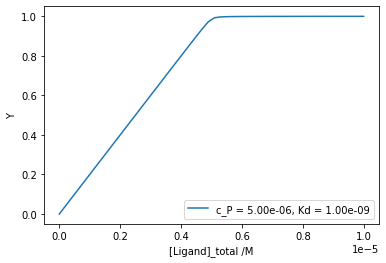

In [37]:
# Let's make some plots
# quadratic
# need x values
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0,1e-5)
# c_L = 1e-6 # M ligand
c_P = 5e-6 # M protein
Kd = 1e-9 # M 
y = quadratic(x, c_P, Kd)/c_P
plt.plot(x,y, label = "c_P = %.2e, Kd = %.2e" % (c_P, Kd))
plt.legend()
plt.xlabel('[Ligand]_total /M')
plt.ylabel('Y')
plt.show()

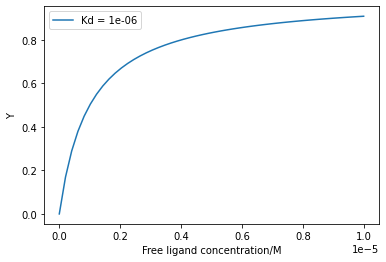

In [42]:
# hyperbolic
Kd = 1e-6
y2 = x/(Kd + x)
plt.plot(x,y2, label = "Kd = %.e" % Kd)
plt.legend()
plt.xlabel('Free ligand concentration/M')
plt.ylabel('Y')
plt.show()

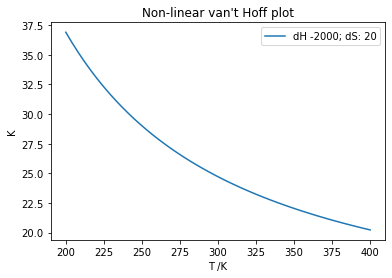

In [55]:
# Van't Hoff:
# dG = -RT ln K = dH - TdS
# K = exp(-(dH-TdS)/RT) = exp(-dH/T + dS/R))
dS = 20
dH = -2e3
R = 8.314
T = np.linspace(200,400)
K = np.exp(-dH/T/R + dS/R)
plt.plot(T,K, label= 'dH %.f; dS: %.f' % (dH, dS))
plt.title('Non-linear van\'t Hoff plot')
plt.xlabel('T /K')
plt.ylabel('K')
plt.legend()
plt.show()